In [1]:
!pip install tensorflow
!pip install matplotlib

import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split

# Note: The following lines are specific to Google Colab and may need to be modified for local Jupyter use
# from google.colab import drive
# drive.mount("/content/gdrive")

# from google.colab import auth
# auth.authenticate_user()

import os
#os.chdir(r"E:\Image analytics\Group - 4\data\TrainData")
os.chdir(r"D:\group -08\data\TrainData")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ls ['img']
input data shape: (128, 128, 14)
data ndvi shape  (128, 128) f_data shape:  (1, 128, 128, 3)


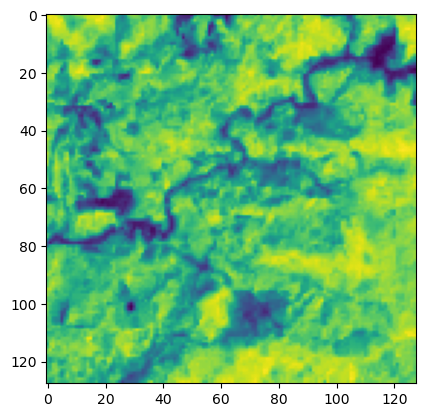

In [2]:
#path_single = r"E:\Image analytics\Group - 4\data\TrainData\img\image_5.h5"
path_single = r"D:\group -08\data\TrainData\img\image_5.h5"

#path_single_mask = r"E:\Image analytics\Group - 4\data\TrainData\mask\mask_5.h5"
path_single_mask = r"D:\group -08\data\TrainData\mask\mask_5.h5"

f_data = np.zeros((1, 128,128, 3))
with h5py.File(path_single) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('img'))
    print("input data shape:", data.shape)
    plt.imshow(data[:, :, 3:0:-1])
    
    data_red = data[:, :, 3]
    data_green = data[:, :, 2]
    data_blue = data[:, :, 1]
    data_nir = data[:, :, 7]
    data_rgb = data[:, :, 3:0:-1]
    data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
    f_data[0, :, :, 0] = data_ndvi
    f_data[0, :, :, 1] = data[:, :, 12]
    f_data[0, :, :, 2] = data[:, :, 13]

    print("data ndvi shape ", data_ndvi.shape, "f_data shape: ", f_data.shape)
    plt.imshow(data_ndvi)



ls ['mask']
input data shape: (128, 128)


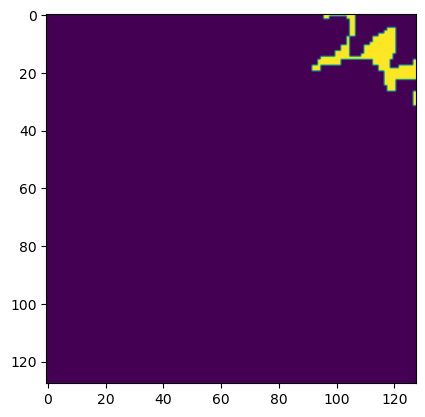

In [3]:
with h5py.File(path_single_mask) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('mask'))
    print("input data shape:", data.shape)
    plt.imshow(data)

In [4]:
#path_single =r"E:\Image analytics\Group - 4\data\TrainData\img\image_5.h5"
#path_single_mask = r"E:\Image analytics\Group - 4\data\TrainData\mask\mask_5.h5"
path_single = r"D:\group -08\data\TrainData\img\image_5.h5"
path_single_mask = r"D:\group -08\data\TrainData\mask\mask_5.h5"

#TRAIN_PATH = r"E:\Image analytics\Group - 4\data\TrainData\img\*.h5"
#TRAIN_MASK = r'E:\Image analytics\Group - 4\data\TrainData\mask\*.h5'

TRAIN_PATH =r"D:\group -08\data\TrainData\img\*.h5"
TRAIN_MASK = r"D:\group -08\data\TrainData\mask\*.h5"

TRAIN_XX = np.zeros((3799, 128, 128, 6))
TRAIN_YY = np.zeros((3799, 128, 128, 1))
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))

In [5]:
# Testing for GPU
import tensorflow as tf
tf.test.gpu_device_name()

for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # Assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # Normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # NDVI calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        # Final array
        TRAIN_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  # RED
        TRAIN_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb  # GREEN
        TRAIN_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb  # BLUE
        TRAIN_XX[i, :, :, 3] = data_ndvi  # NDVI
        TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope  # SLOPE
        TRAIN_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation  # ELEVATION
    
    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('mask'))
        TRAIN_YY[i, :, :, 0] = data

0 D:\group -08\data\TrainData\img\image_1.h5 D:\group -08\data\TrainData\mask\mask_1.h5
1 D:\group -08\data\TrainData\img\image_10.h5 D:\group -08\data\TrainData\mask\mask_10.h5
2 D:\group -08\data\TrainData\img\image_100.h5 D:\group -08\data\TrainData\mask\mask_100.h5
3 D:\group -08\data\TrainData\img\image_1000.h5 D:\group -08\data\TrainData\mask\mask_1000.h5
4 D:\group -08\data\TrainData\img\image_1001.h5 D:\group -08\data\TrainData\mask\mask_1001.h5
5 D:\group -08\data\TrainData\img\image_1002.h5 D:\group -08\data\TrainData\mask\mask_1002.h5
6 D:\group -08\data\TrainData\img\image_1003.h5 D:\group -08\data\TrainData\mask\mask_1003.h5
7 D:\group -08\data\TrainData\img\image_1004.h5 D:\group -08\data\TrainData\mask\mask_1004.h5
8 D:\group -08\data\TrainData\img\image_1005.h5 D:\group -08\data\TrainData\mask\mask_1005.h5
9 D:\group -08\data\TrainData\img\image_1006.h5 D:\group -08\data\TrainData\mask\mask_1006.h5
10 D:\group -08\data\TrainData\img\image_1007.h5 D:\group -08\data\Train

C:\Users\CUTM\AppData\Local\Temp\ipykernel_1712\4145541305.py:29: RuntimeWarning: invalid value encountered in divide
  TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope  # SLOPE


1676 D:\group -08\data\TrainData\img\image_2507.h5 D:\group -08\data\TrainData\mask\mask_2507.h5
1677 D:\group -08\data\TrainData\img\image_2508.h5 D:\group -08\data\TrainData\mask\mask_2508.h5
1678 D:\group -08\data\TrainData\img\image_2509.h5 D:\group -08\data\TrainData\mask\mask_2509.h5
1679 D:\group -08\data\TrainData\img\image_251.h5 D:\group -08\data\TrainData\mask\mask_251.h5
1680 D:\group -08\data\TrainData\img\image_2510.h5 D:\group -08\data\TrainData\mask\mask_2510.h5
1681 D:\group -08\data\TrainData\img\image_2511.h5 D:\group -08\data\TrainData\mask\mask_2511.h5
1682 D:\group -08\data\TrainData\img\image_2512.h5 D:\group -08\data\TrainData\mask\mask_2512.h5
1683 D:\group -08\data\TrainData\img\image_2513.h5 D:\group -08\data\TrainData\mask\mask_2513.h5
1684 D:\group -08\data\TrainData\img\image_2514.h5 D:\group -08\data\TrainData\mask\mask_2514.h5
1685 D:\group -08\data\TrainData\img\image_2515.h5 D:\group -08\data\TrainData\mask\mask_2515.h5
1686 D:\group -08\data\TrainData

C:\Users\CUTM\AppData\Local\Temp\ipykernel_1712\4145541305.py:22: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


2268 D:\group -08\data\TrainData\img\image_304.h5 D:\group -08\data\TrainData\mask\mask_304.h5
2269 D:\group -08\data\TrainData\img\image_3040.h5 D:\group -08\data\TrainData\mask\mask_3040.h5
2270 D:\group -08\data\TrainData\img\image_3041.h5 D:\group -08\data\TrainData\mask\mask_3041.h5
2271 D:\group -08\data\TrainData\img\image_3042.h5 D:\group -08\data\TrainData\mask\mask_3042.h5
2272 D:\group -08\data\TrainData\img\image_3043.h5 D:\group -08\data\TrainData\mask\mask_3043.h5
2273 D:\group -08\data\TrainData\img\image_3044.h5 D:\group -08\data\TrainData\mask\mask_3044.h5
2274 D:\group -08\data\TrainData\img\image_3045.h5 D:\group -08\data\TrainData\mask\mask_3045.h5
2275 D:\group -08\data\TrainData\img\image_3046.h5 D:\group -08\data\TrainData\mask\mask_3046.h5
2276 D:\group -08\data\TrainData\img\image_3047.h5 D:\group -08\data\TrainData\mask\mask_3047.h5
2277 D:\group -08\data\TrainData\img\image_3048.h5 D:\group -08\data\TrainData\mask\mask_3048.h5
2278 D:\group -08\data\TrainData

In [6]:
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001
print(TRAIN_XX.min(), TRAIN_XX.max(), TRAIN_YY.min(), TRAIN_YY.max())

-1.0 1.0 0.0 1.0


In [7]:
def dice_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.math.sigmoid(y_pred)
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return 1 - numerator / denominator

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


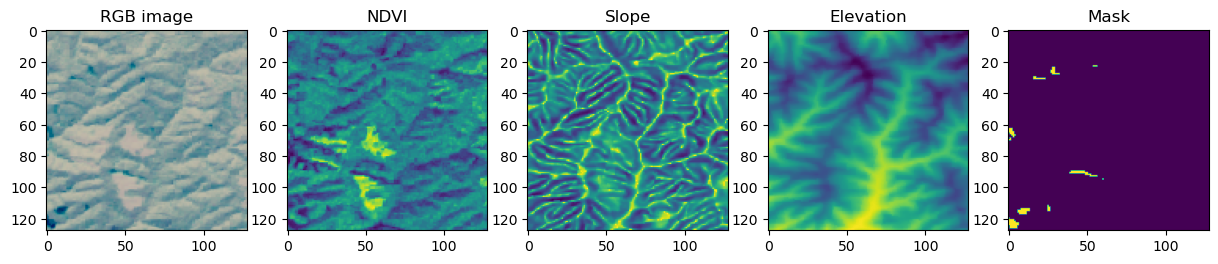

In [8]:
img = 2344
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 10))

ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(TRAIN_XX[img, :, :, 0:3])
ax2.imshow(TRAIN_XX[img, :, :, 3])
ax3.imshow(TRAIN_XX[img, :, :, 4])
ax4.imshow(TRAIN_XX[img, :, :, 5])
ax5.imshow(TRAIN_YY[img, :, :, 0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3039, 128, 128, 6) (3039, 128, 128, 1)


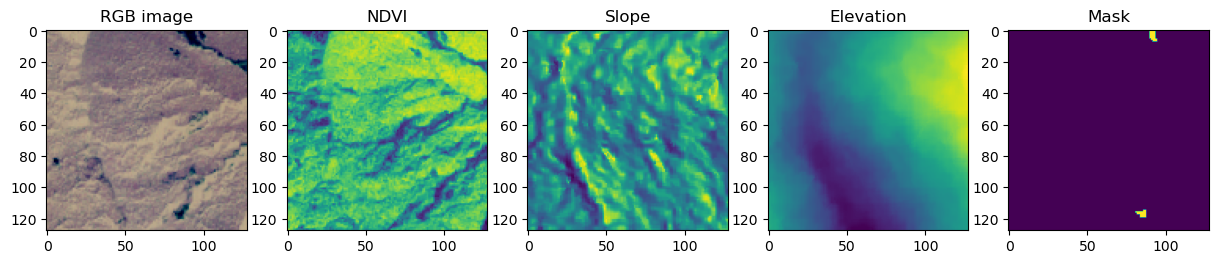

In [9]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(TRAIN_XX, TRAIN_YY, test_size=0.2, shuffle=True)

img = 2004
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 10))

ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(x_train[img, :, :, 5])
ax5.imshow(y_train[img, :, :, 0])

print(x_train.shape, y_train.shape)

# Release memory
del TRAIN_XX
del TRAIN_YY
del all_train
del all_mask

In [10]:
## Custom metrics and U-Net Model

import tensorflow as tf

# Custom metrics
def recall_m(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+tf.keras.backend.epsilon()))

# U-Net model
def unet_model(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS):
    inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))
    
    # Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)
    
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
     
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
     
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    # Expansive path 
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
     
    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])
    
    return model






In [11]:
# Create and train the model
model = unet_model(128, 128, 6)
model.summary()

checkpointer = tf.keras.callbacks.ModelCheckpoint("best_model.keras", monitor="val_f1_m", verbose=1, save_best_only=True, mode="max")
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10, verbose=1, mode='max')

callbacks = [checkpointer]
history = model.fit(x_train, y_train, batch_size=16,  
                    epochs=150, 
                    verbose=2,
                    validation_data=(x_valid, y_valid),
                    callbacks=callbacks)

model.save("model_save.keras")

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 128, 128, 6)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 128, 128, 16)      │             880 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 128, 128, 16)      │               0 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 128, 128, 16)      │           2,320 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 64, 64, 16)        │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 64, 64, 32)        │           4,640 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 64, 64, 32)        │               0 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 64, 64, 32)        │           9,248 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 32, 32, 32)        │               0 │ conv2d_3[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 32, 32, 64)        │          18,496 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 32, 32, 64)        │               0 │ conv2d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 32, 32, 64)        │          36,928 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 16, 16, 64)        │               0 │ conv2d_5[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 16, 16, 128)       │          73,856 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_3 (Dropout)           │ (None, 16, 16, 128)       │               0 │ conv2d_6[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 16, 16, 128)       │         147,584 │ dropout_3[0][0]            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 1,941,537 (7.41 MB)

 Trainable params: 1,941,537 (7.41 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150

Epoch 1: val_f1_m improved from -inf to 0.55770, saving model to best_model.keras
190/190 - 37s - 196ms/step - accuracy: 0.9745 - f1_m: 0.2699 - loss: 0.0748 - precision_m: 0.4992 - recall_m: 0.2243 - val_accuracy: 0.9842 - val_f1_m: 0.5577 - val_loss: 0.0408 - val_precision_m: 0.6720 - val_recall_m: 0.4990
Epoch 2/150

Epoch 2: val_f1_m did not improve from 0.55770
190/190 - 33s - 174ms/step - accuracy: 0.9835 - f1_m: 0.5730 - loss: 0.0442 - precision_m: 0.7259 - recall_m: 0.5002 - val_accuracy: 0.9861 - val_f1_m: 0.5309 - val_loss: 0.0371 - val_precision_m: 0.8271 - val_recall_m: 0.3993
Epoch 3/150

Epoch 3: val_f1_m improved from 0.55770 to 0.64690, saving model to best_model.keras
190/190 - 32s - 169ms/step - accuracy: 0.9849 - f1_m: 0.6130 - loss: 0.0398 - precision_m: 0.7417 - recall_m: 0.5380 - val_accuracy: 0.9878 - val_f1_m: 0.6469 - val_loss: 0.0316 - val_precision_m: 0.7474 - val_recall_m: 0.5788
Epoch 4/150

Epoch 4: val_f1_m improved from 0.64690 to 0.67049, s

In [12]:
loss, accuracy, f1_score, precision, recall  = model.evaluate(x_valid, y_valid, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

0.035903628915548325 0.9891780614852905 0.6966450214385986 0.811680018901825 0.6132081747055054


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step
Loss: 0.035903628915548325, Accuracy: 0.9891780614852905, F1 Score: 0.6966450214385986, Precision: 0.811680018901825, Recall: 0.6132081747055054
 Dice Coefficient: 0.7035483210978698, PR AUC: 0.8031535695493639


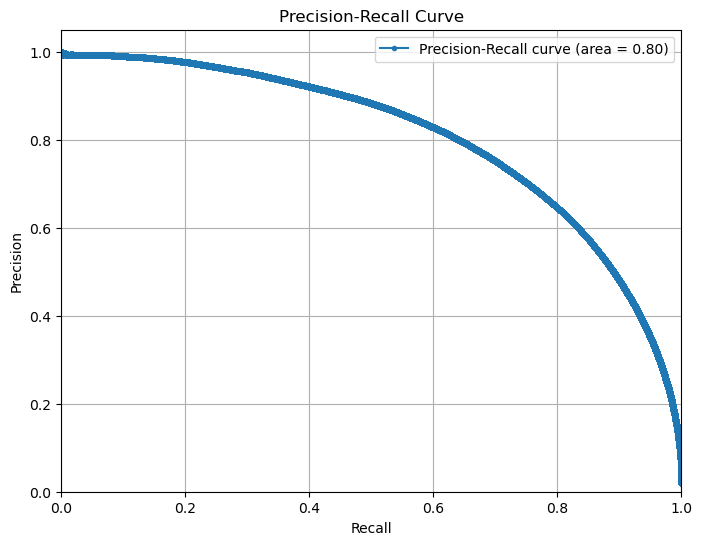

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc


def dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection) / (np.sum(y_true) + np.sum(y_pred)) if (np.sum(y_true) + np.sum(y_pred)) != 0 else 0

# Evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)

# Get predictions
y_pred_probs = model.predict(x_valid)
y_pred = (y_pred_probs > 0.5).astype(int)  # Assuming binary classification with a threshold of 0.5

# Calculate additional metrics
dice = dice_coefficient(y_valid, y_pred)

# Calculate Precision-Recall Curve
precision_curve, recall_curve, _ = precision_recall_curve(y_valid.flatten(), y_pred_probs.flatten())
pr_auc = auc(recall_curve, precision_curve)

# Print the results
print(f'Loss: {loss}, Accuracy: {accuracy}, F1 Score: {f1_score}, Precision: {precision}, Recall: {recall}')
print(f' Dice Coefficient: {dice}, PR AUC: {pr_auc}')

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, marker='.', label='Precision-Recall curve (area = {:.2f})'.format(pr_auc))
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.legend()
plt.show()

In [29]:
pip install numpy matplotlib opencv-python

Note: you may need to restart the kernel to use updated packages.


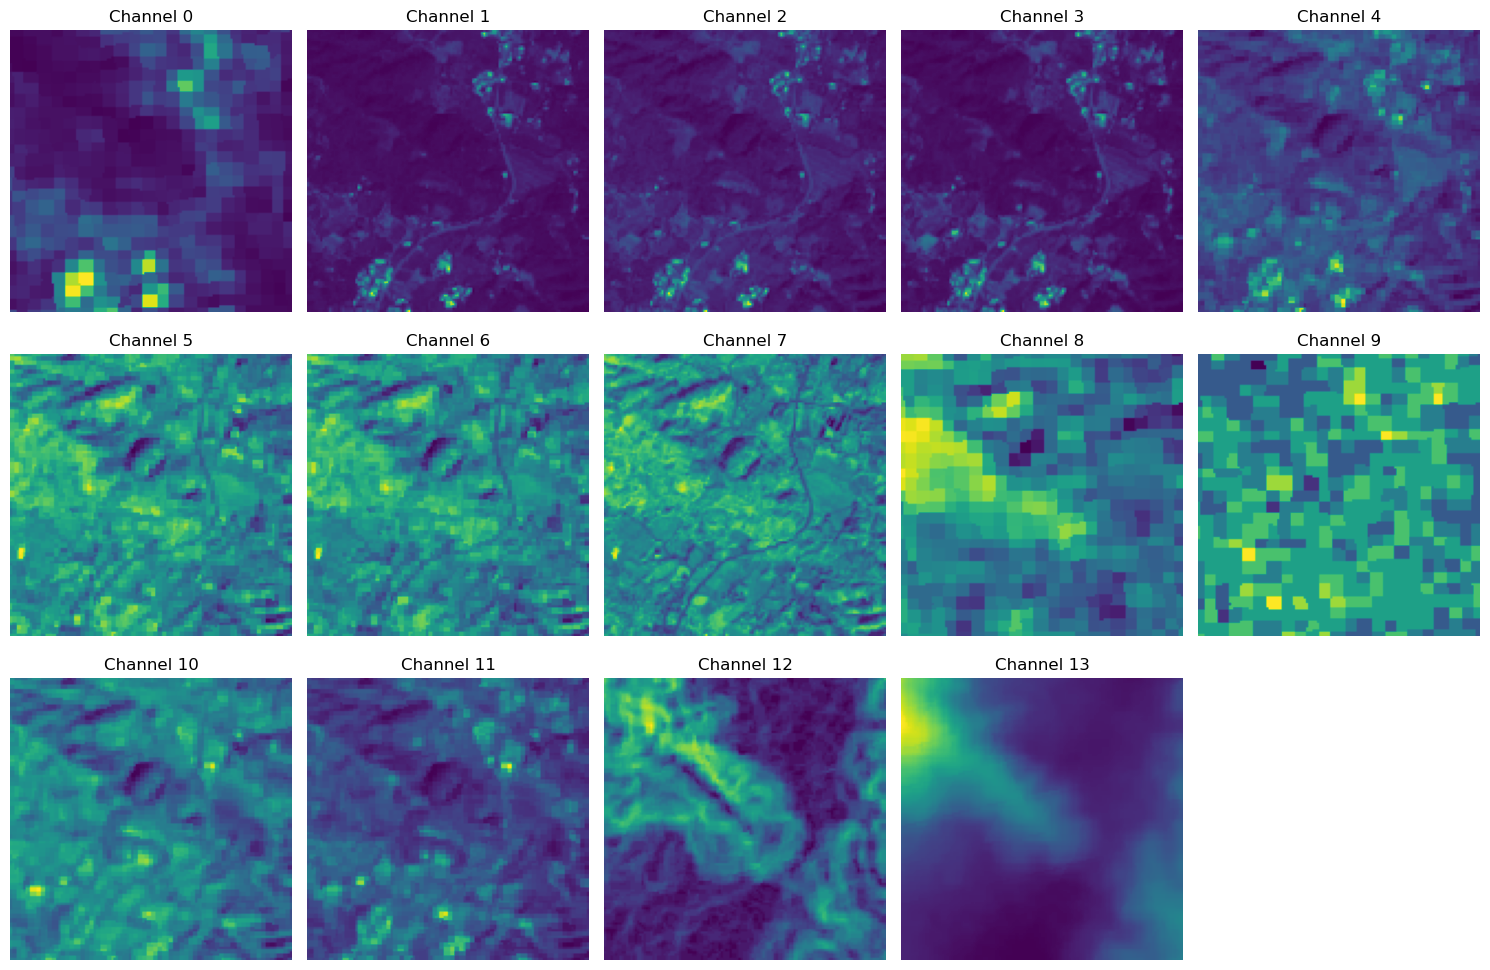

In [30]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Load the HDF5 file
h5_file_path = r"D:\group -08\data\TrainData\img\image_2005.h5"
with h5py.File(h5_file_path, 'r') as f:
    image = f['img'][()]

# Visualize all channels separately
plt.figure(figsize=(15, 10))
for i in range(image.shape[2]):
    plt.subplot(3, 5, i+1)  # Adjust the grid size based on number of channels
    channel_image = image[:, :, i]
    if channel_image.dtype != np.uint8:
        channel_image = ((channel_image - channel_image.min()) / 
                        (channel_image.max() - channel_image.min()) * 255).astype(np.uint8)
    plt.imshow(channel_image)
    plt.title(f'Channel {i}')
    plt.axis('off')
plt.tight_layout()
plt.show()

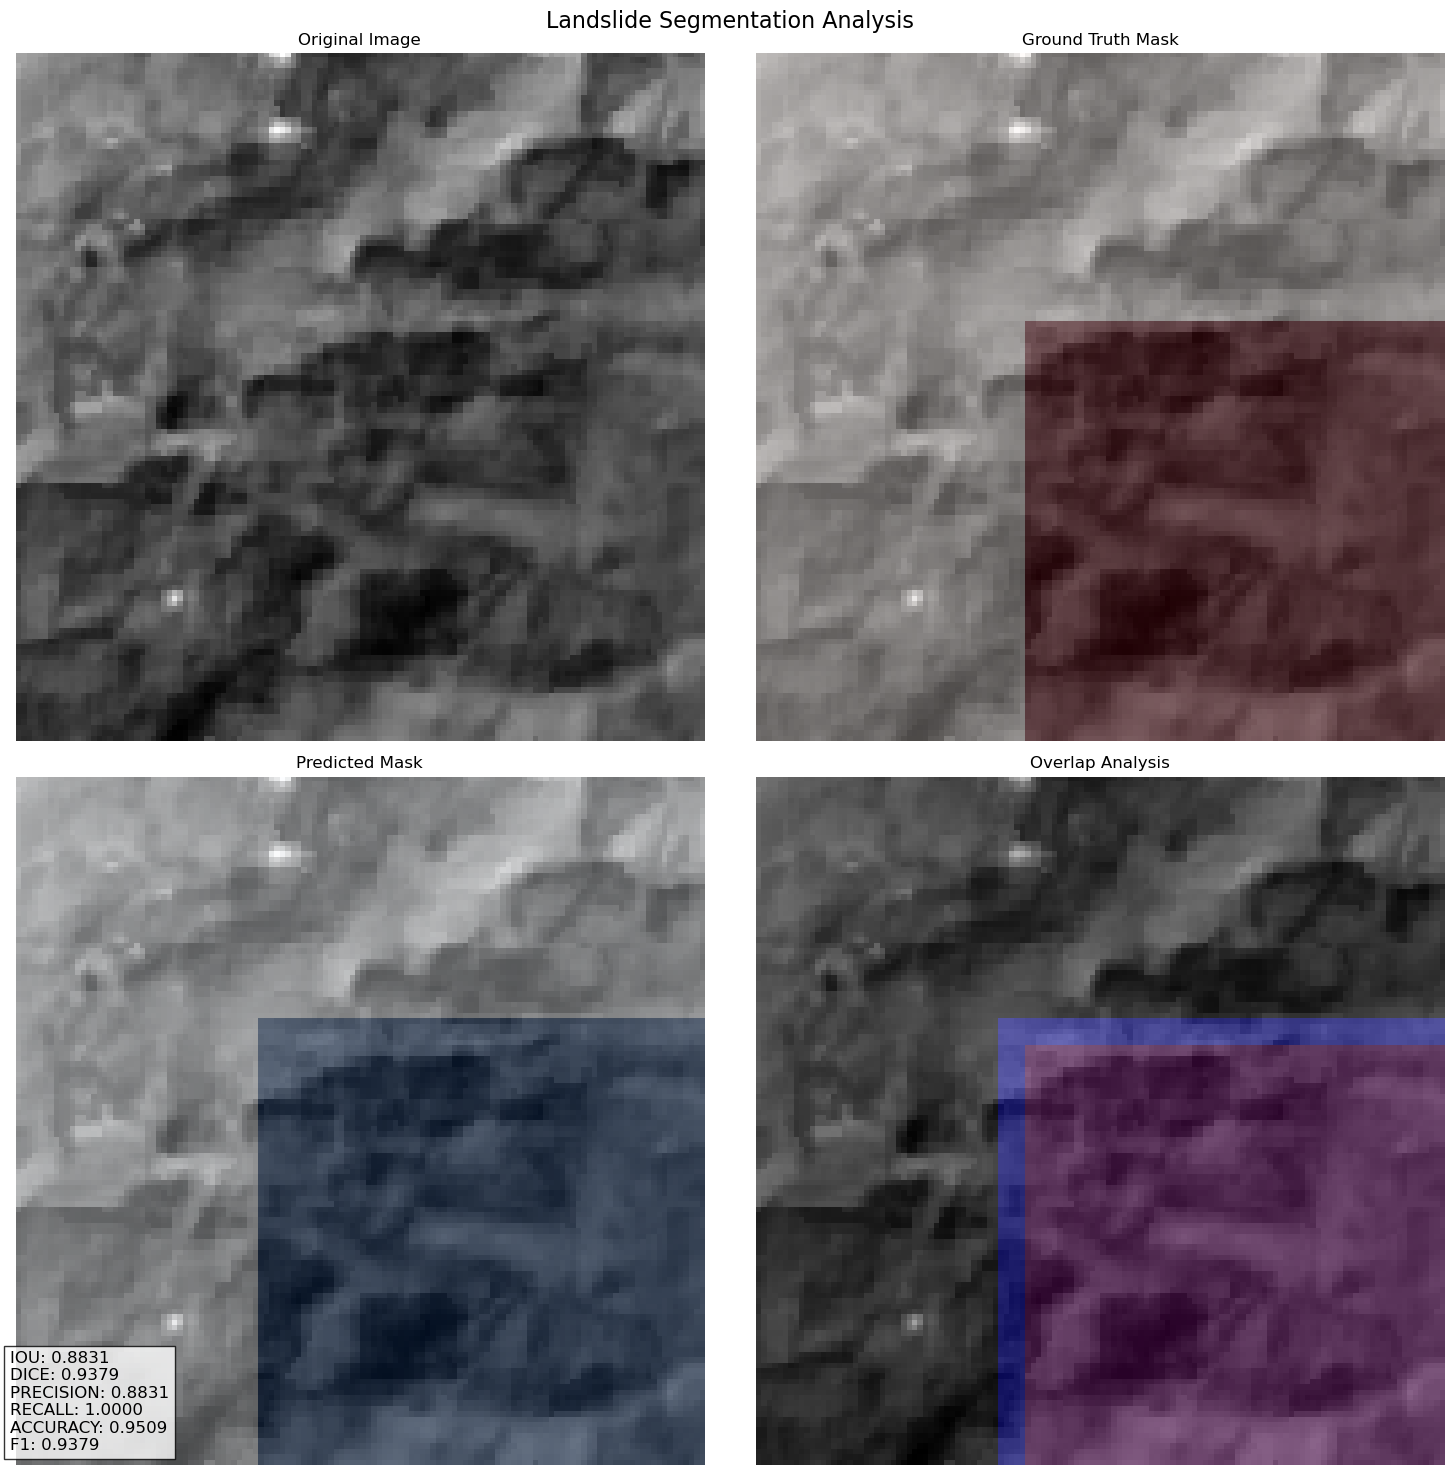


Segmentation Metrics:
IOU: 0.8831
DICE: 0.9379
PRECISION: 0.8831
RECALL: 1.0000
ACCURACY: 0.9509
F1: 0.9379


In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import h5py
from sklearn.metrics import confusion_matrix

def calculate_segmentation_metrics(ground_truth_mask, predicted_mask):
    """
    Calculate various segmentation metrics including IoU for landslide masks
    
    Args:
        ground_truth_mask: Binary mask of ground truth landslide areas
        predicted_mask: Binary mask of predicted landslide areas
    
    Returns:
        Dictionary containing various metrics
    """
    # Ensure masks are binary
    ground_truth_mask = (ground_truth_mask > 0).astype(np.uint8)
    predicted_mask = (predicted_mask > 0).astype(np.uint8)
    
    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(ground_truth_mask.ravel(), 
                                    predicted_mask.ravel()).ravel()
    
    # Calculate metrics
    intersection = tp
    union = tp + fp + fn
    
    metrics = {
        'iou': intersection / union if union > 0 else 0,  # Intersection over Union
        'dice': 2 * tp / (2 * tp + fp + fn) if (2 * tp + fp + fn) > 0 else 0,  # Dice coefficient
        'precision': tp / (tp + fp) if (tp + fp) > 0 else 0,
        'recall': tp / (tp + fn) if (tp + fn) > 0 else 0,
        'accuracy': (tp + tn) / (tp + tn + fp + fn)
    }
    
    metrics['f1'] = 2 * (metrics['precision'] * metrics['recall']) / \
                    (metrics['precision'] + metrics['recall']) \
                    if (metrics['precision'] + metrics['recall']) > 0 else 0
    
    return metrics

def visualize_segmentation(image, ground_truth_mask, predicted_mask, metrics):
    """
    Visualize the segmentation results with overlays
    """
    # Create a figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    fig.suptitle('Landslide Segmentation Analysis', fontsize=16)
    
    # Prepare image for display
    if len(image.shape) == 3:
        display_image = np.mean(image, axis=2)
    else:
        display_image = image.copy()
    
    display_image = cv2.normalize(display_image, None, 0, 255, cv2.NORM_MINMAX)
    
    # Plot original image
    axes[0, 0].imshow(display_image, cmap='gray')
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')
    
    # Plot ground truth mask
    axes[0, 1].imshow(display_image, cmap='gray')
    axes[0, 1].imshow(ground_truth_mask, alpha=0.3, cmap='Reds')
    axes[0, 1].set_title('Ground Truth Mask')
    axes[0, 1].axis('off')
    
    # Plot predicted mask
    axes[1, 0].imshow(display_image, cmap='gray')
    axes[1, 0].imshow(predicted_mask, alpha=0.3, cmap='Blues')
    axes[1, 0].set_title('Predicted Mask')
    axes[1, 0].axis('off')
    
    # Plot overlay of both masks
    overlap = np.zeros_like(display_image)
    overlap[ground_truth_mask > 0] = 1  # Red for ground truth
    overlap[predicted_mask > 0] += 2     # Blue for predictions
    
    # Create custom colormap for overlap visualization
    from matplotlib.colors import ListedColormap
    colors = ['black', 'red', 'blue', 'purple']  # purple for overlap
    cmap = ListedColormap(colors)
    
    axes[1, 1].imshow(display_image, cmap='gray')
    axes[1, 1].imshow(overlap, alpha=0.3, cmap=cmap)
    axes[1, 1].set_title('Overlap Analysis')
    axes[1, 1].axis('off')
    
    # Add metrics text
    metrics_text = '\n'.join([
        f'{key.upper()}: {value:.4f}' for key, value in metrics.items()
    ])
    plt.figtext(0.02, 0.02, metrics_text, fontsize=12, 
                bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    return fig

# Example usage
def main():
    # Load the image and masks from H5 file
    h5_file_path = r"D:\group -08\data\TrainData\img\image_5.h5"
    with h5py.File(h5_file_path, 'r') as f:
        image = f['img'][()]
        
        # Assuming masks are stored in the same file
        # Adjust these keys based on your actual H5 file structure
        try:
            ground_truth_mask = f['ground_truth'][()]
            predicted_mask = f['prediction'][()]  # If you have predictions stored
        except KeyError:
            # Create dummy masks for demonstration
            print("Warning: Using dummy masks for demonstration")
            ground_truth_mask = np.zeros_like(image[:,:,0])
            ground_truth_mask[50:150, 50:150] = 1
            predicted_mask = np.zeros_like(image[:,:,0])
            predicted_mask[45:155, 45:155] = 1
    
    # Calculate metrics
    metrics = calculate_segmentation_metrics(ground_truth_mask, predicted_mask)
    
    # Visualize results
    fig = visualize_segmentation(image, ground_truth_mask, predicted_mask, metrics)
    plt.show()
    
    # Print detailed metrics
    print("\nSegmentation Metrics:")
    for key, value in metrics.items():
        print(f"{key.upper()}: {value:.4f}")

if __name__ == "__main__":
    main()

IoU Score: 0.8264


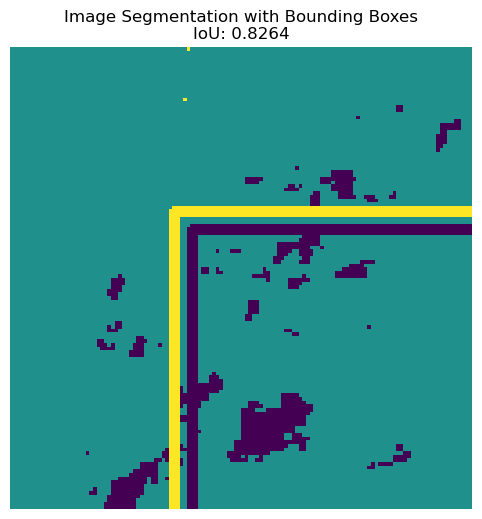

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import h5py

def calculate_iou(boxA, boxB):
    """
    Calculate IoU between two bounding boxes
    Each box should be in format (x1, y1, x2, y2)
    """
    # Ensure the coordinates are in correct order (min before max)
    boxA = np.array([min(boxA[0], boxA[2]), min(boxA[1], boxA[3]),
                     max(boxA[0], boxA[2]), max(boxA[1], boxA[3])])
    boxB = np.array([min(boxB[0], boxB[2]), min(boxB[1], boxB[3]),
                     max(boxB[0], boxB[2]), max(boxB[1], boxB[3])])
    
    # Calculate intersection coordinates
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    
    # Calculate areas
    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    
    # Calculate union area
    unionArea = boxAArea + boxBArea - interArea
    
    # Calculate IoU
    iou = interArea / float(unionArea) if unionArea > 0 else 0
    
    return iou

# Load and process the h5 image
h5_file_path = r"D:\group -08\data\TrainData\img\image_5.h5"
with h5py.File(h5_file_path, 'r') as f:
    h5_image = f['img'][()]

# Define the ground truth and predicted boxes
ground_truth_box = (50, 50, 150, 150)
predicted_box = (45, 45, 155, 155)

# Calculate IoU
iou = calculate_iou(ground_truth_box, predicted_box)
print(f'IoU Score: {iou:.4f}')

# Create visualization
plt.figure(figsize=(8, 6))

# Prepare image for display
if len(h5_image.shape) == 3:
    display_image = np.mean(h5_image, axis=2).astype(np.uint8)
else:
    display_image = h5_image.astype(np.uint8)

# Normalize the display image
display_image = cv2.normalize(display_image, None, 0, 255, cv2.NORM_MINMAX)

# Draw ground truth box (green)
cv2.rectangle(display_image, 
              (ground_truth_box[0], ground_truth_box[1]), 
              (ground_truth_box[2], ground_truth_box[3]), 
              (0, 255, 0), 2)

# Draw predicted box (blue)
cv2.rectangle(display_image, 
              (predicted_box[0], predicted_box[1]), 
              (predicted_box[2], predicted_box[3]), 
              (255, 0, 0), 2)

plt.imshow(display_image)
plt.title(f'Image Segmentation with Bounding Boxes\nIoU: {iou:.4f}')
plt.axis('off')
plt.show()

In [33]:
import os
import numpy as np
from PIL import Image
import h5py

def calculate_iou(pred_mask, true_mask):
    
    Calculate the Intersection over Union (IoU) of two segmentation masks.
    
    Parameters:
    pred_mask (numpy.ndarray): The predicted segmentation mask.
    true_mask (numpy.ndarray): The ground truth segmentation mask.
    
    Returns:
    float: The Intersection over Union score.
    
    intersection = np.logical_and(pred_mask, true_mask).sum()
    union = np.logical_or(pred_mask, true_mask).sum()
    return intersection / union

def semantic_segmentation_iou(image_path):
    
    Calculate the IoU for semantic segmentation on a given image.
    
    Parameters:
    image_path (str): The file path to the input image.
    
    Returns:
    float: The average IoU across all segmented classes, or None if the image/mask are not found.
    
    try:
        # Load the image and ground truth mask
        with h5py.File(image_path, 'r') as f:
            if 'image' in f and 'mask' in f:
                image = f['image'][:]
                true_mask = f['mask'][:]
            else:
                print(f"Error: 'image' or 'mask' dataset not found in {image_path}")
                return None
    except (KeyError, OSError) as e:
        print(f"Error: {e}")
        return None
    
    # Load the predicted segmentation mask (replace with your model's output)
    pred_mask = get_predicted_mask(image)
    
    # Calculate IoU per class
    ious = []
    for class_id in np.unique(true_mask):
        class_true_mask = (true_mask == class_id)
        class_pred_mask = (pred_mask == class_id)
        iou = calculate_iou(class_pred_mask, class_true_mask)
        ious.append(iou)
    
    # Calculate average IoU
    avg_iou = np.mean(ious)
    return avg_iou

# Example usage
image_path = "D:\group -08\data\TrainData\img\image_5.h5"
average_iou = semantic_segmentation_iou(image_path)
if average_iou is not None:
    print(f"Average IoU: {average_iou:.2f}")
else:
    print("Unable to calculate IoU.")

SyntaxError: invalid syntax (2442797047.py, line 8)

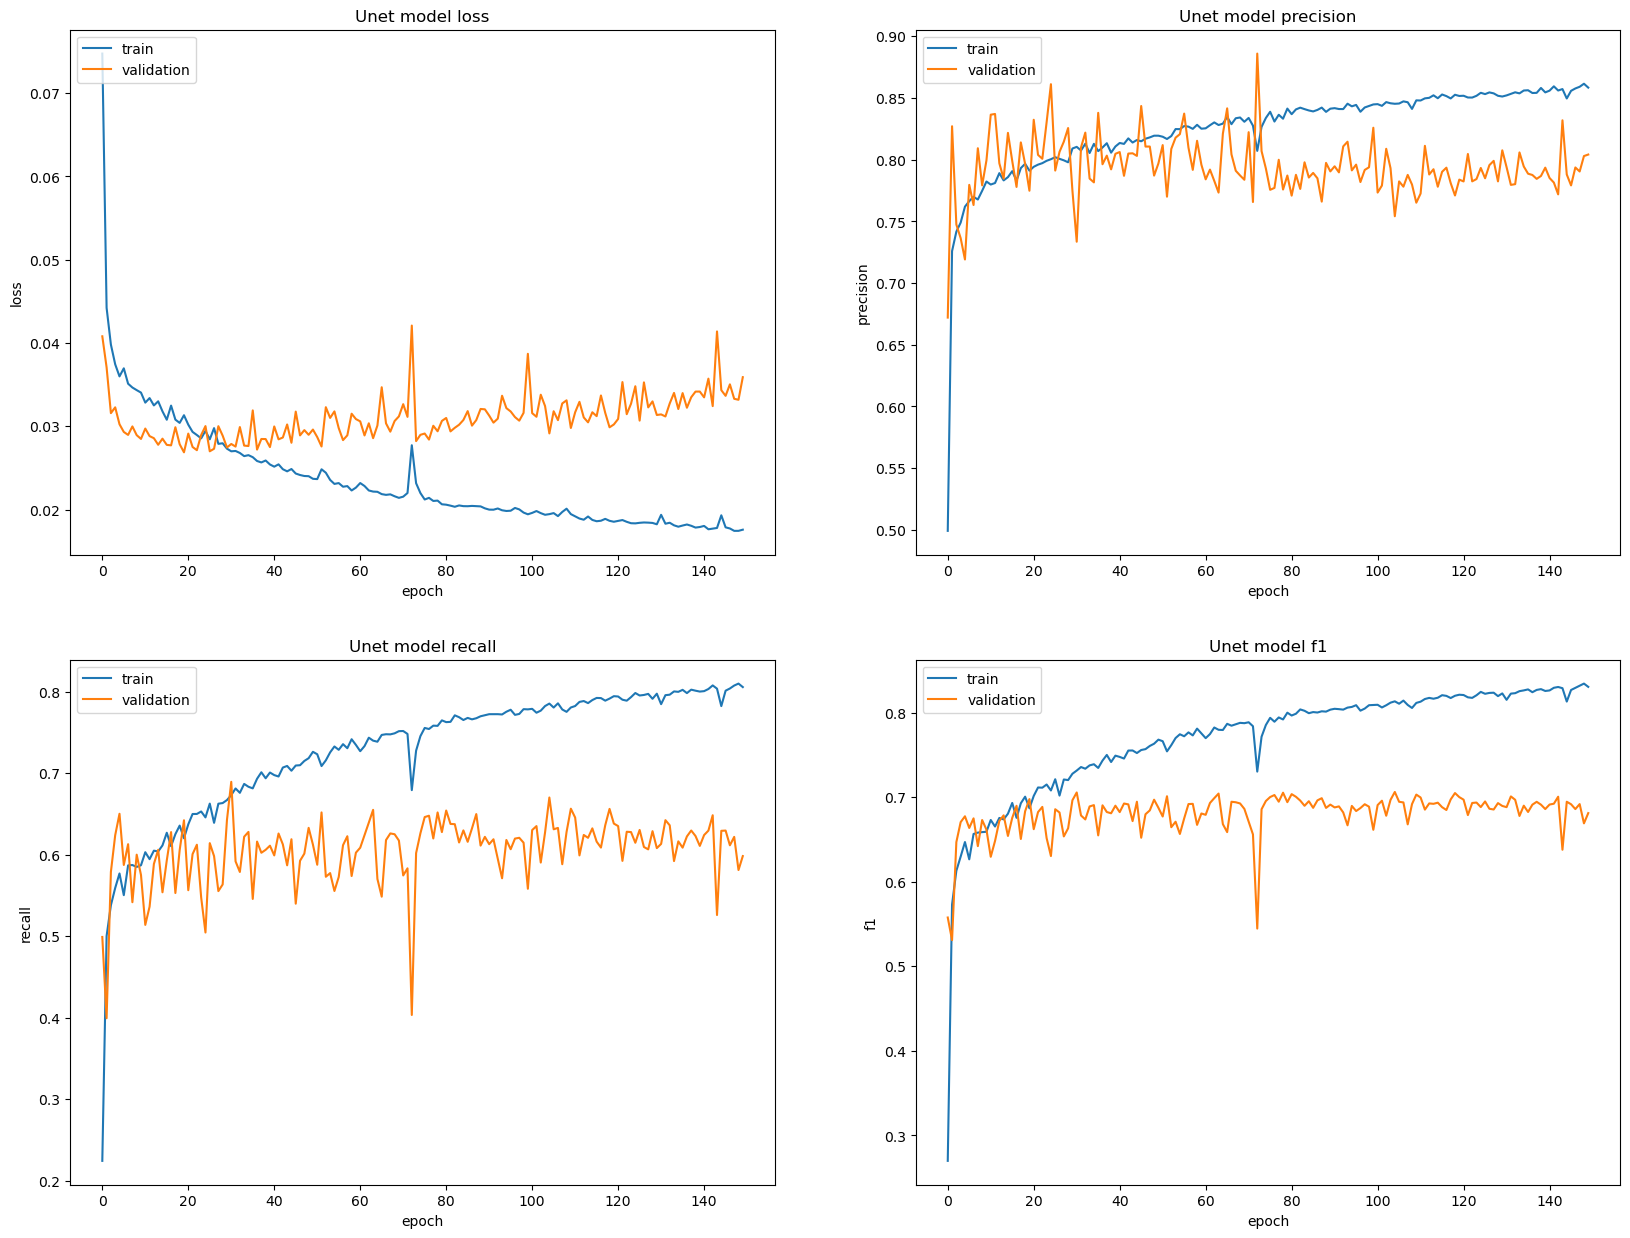

In [34]:
fig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.title.set_text('Unet model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history.history['precision_m'])
ax12.plot(history.history['val_precision_m'])
ax12.set_title('Unet model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history.history['recall_m'])
ax13.plot(history.history['val_recall_m'])
ax13.set_title('Unet model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history.history['f1_m'])
ax14.plot(history.history['val_f1_m'])
ax14.set_title('Unet model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')   

In [35]:
threshold = 0.5
pred_img = model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Training Image')

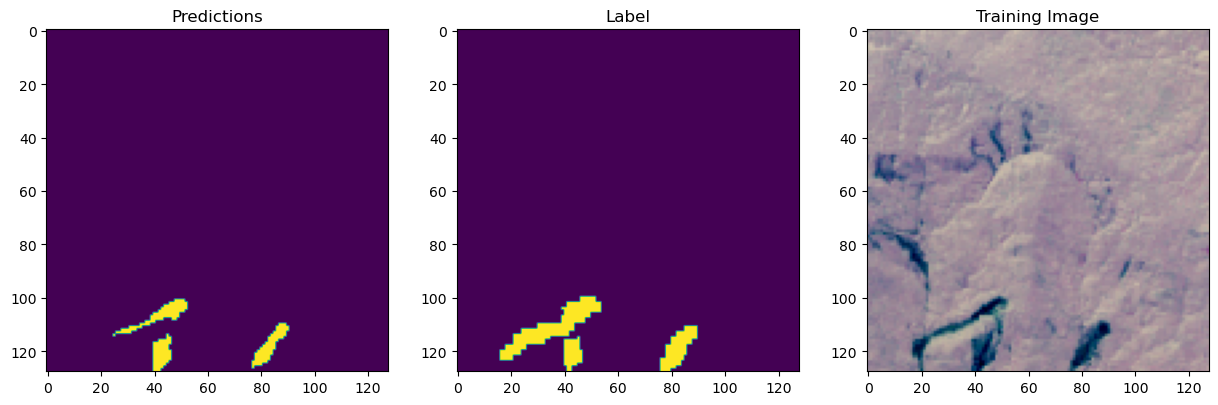

In [36]:
img = 11
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

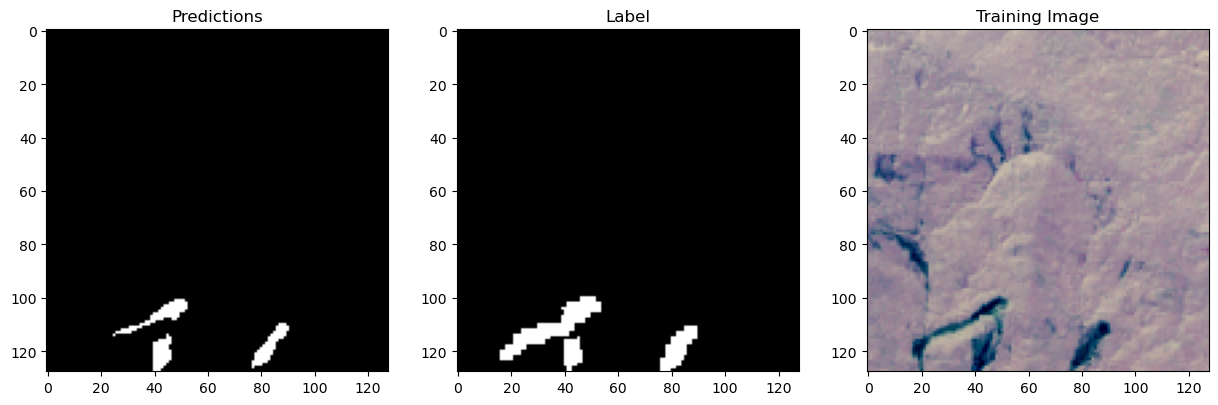

In [39]:
import os
from matplotlib.pyplot import imsave
import numpy as np

# Set the image index
img = 11

# Create the subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))

# Plot the images
ax1.imshow(pred_img[img, :, :, 0], cmap='gray')
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0], cmap='gray')
ax2.set_title("Label")
ax3.imshow(np.clip(x_valid[img, :, :, 0:3], 0, 1))
ax3.set_title('Training Image')

# Create the output directories
output_dir = "D:\group -08\data\output"
training_image_dir = os.path.join(output_dir, "i")
label_dir = os.path.join(output_dir, "m")
prediction_dir = os.path.join(output_dir, "p")

os.makedirs(training_image_dir, exist_ok=True)
os.makedirs(label_dir, exist_ok=True)
os.makedirs(prediction_dir, exist_ok=True)

# Save the images
training_image_path = os.path.join(training_image_dir, "training_image.png")
label_path = os.path.join(label_dir, "label.png")
prediction_path = os.path.join(prediction_dir, "prediction.png")

imsave(training_image_path, np.clip(x_valid[img, :, :, 0:3], 0, 1))
imsave(label_path, y_valid[img, :, :, 0], cmap='gray')
imsave(prediction_path, pred_img[img, :, :, 0], cmap='gray')

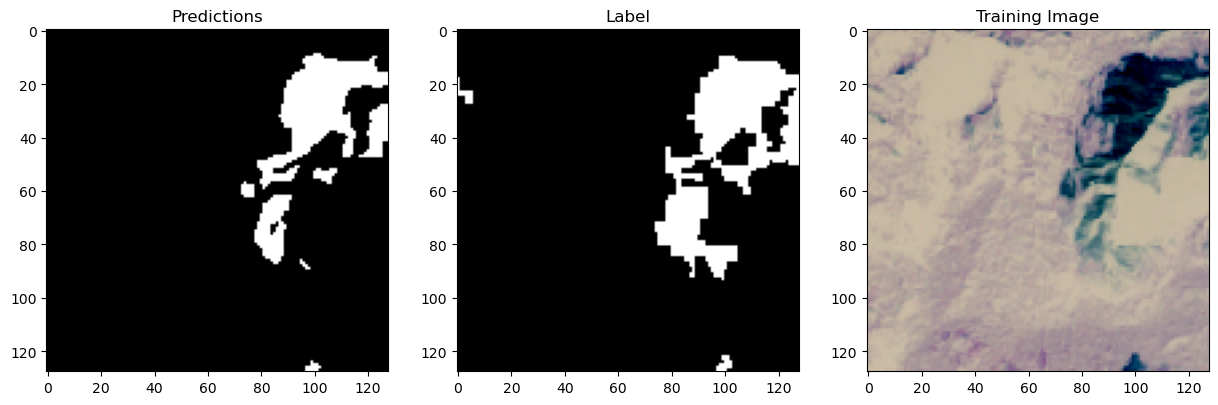

In [48]:
import os
from matplotlib.pyplot import imsave
import numpy as np

# Set the image index
img = 5

# Create the subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))

# Plot the images
ax1.imshow(pred_img[img, :, :, 0], cmap='gray')
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0], cmap='gray')
ax2.set_title("Label")
ax3.imshow(np.clip(x_valid[img, :, :, 0:3], 0, 1))
ax3.set_title('Training Image')

# Create the output directories
output_dir = "D:\group -08\data\output"
training_image_dir = os.path.join(output_dir, "i")
label_dir = os.path.join(output_dir, "m")
prediction_dir = os.path.join(output_dir, "p")

os.makedirs(training_image_dir, exist_ok=True)
os.makedirs(label_dir, exist_ok=True)
os.makedirs(prediction_dir, exist_ok=True)

# Save the images
training_image_path = os.path.join(training_image_dir, "training_image.png")
label_path = os.path.join(label_dir, "label.png")
prediction_path = os.path.join(prediction_dir, "prediction.png")

imsave(training_image_path, np.clip(x_valid[img, :, :, 0:3], 0, 1))
imsave(label_path, y_valid[img, :, :, 0], cmap='gray')
imsave(prediction_path, pred_img[img, :, :, 0], cmap='gray')

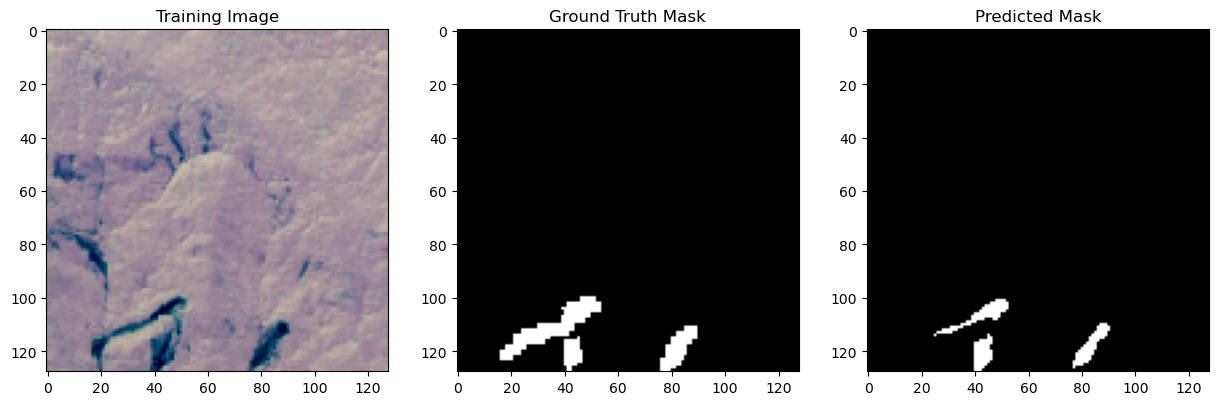

IoU: 0.96


In [41]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def calculate_iou(pred_mask, true_mask):
    """
    Calculate the Intersection over Union (IoU) of two segmentation masks.
    
    Parameters:
    pred_mask (numpy.ndarray): The predicted segmentation mask.
    true_mask (numpy.ndarray): The ground truth segmentation mask.
    
    Returns:
    float: The Intersection over Union score.
    """
    intersection = np.logical_and(pred_mask, true_mask).sum()
    union = np.logical_or(pred_mask, true_mask).sum()
    return intersection / union

def visualize_masks(training_image, true_mask, pred_mask):
    """
    Visualize the ground truth and predicted segmentation masks.
    
    Parameters:
    training_image (numpy.ndarray): The input image.
    true_mask (numpy.ndarray): The ground truth segmentation mask.
    pred_mask (numpy.ndarray): The predicted segmentation mask.
    """
    # Create the figure
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))
    
    # Plot the images
    ax1.imshow(training_image)
    ax1.set_title("Training Image")
    ax2.imshow(true_mask, cmap='gray')
    ax2.set_title("Ground Truth Mask")
    ax3.imshow(pred_mask, cmap='gray')
    ax3.set_title("Predicted Mask")
    
    plt.show()

def semantic_segmentation_iou(training_image_path, true_mask_path, pred_mask_path):
    """
    Calculate the IoU for semantic segmentation on the given images.
    
    Parameters:
    training_image_path (str): The file path to the input image.
    true_mask_path (str): The file path to the ground truth segmentation mask.
    pred_mask_path (str): The file path to the predicted segmentation mask.
    
    Returns:
    float: The Intersection over Union score.
    """
    # Load the images
    training_image = np.array(Image.open(training_image_path))
    true_mask = np.array(Image.open(true_mask_path))
    pred_mask = np.array(Image.open(pred_mask_path))
    
    # Calculate the IoU
    iou = calculate_iou(pred_mask, true_mask)
    
    # Visualize the masks
    visualize_masks(training_image, true_mask, pred_mask)
    
    return iou

# Example usage
training_image_path = r"D:\group -08\data\output\i\training_image.png"
true_mask_path = r"D:\group -08\data\output\m\label.png"
pred_mask_path = r"D:\group -08\data\output\p\prediction.png"

iou = semantic_segmentation_iou(training_image_path, true_mask_path, pred_mask_path)
print(f"IoU: {iou:.2f}")

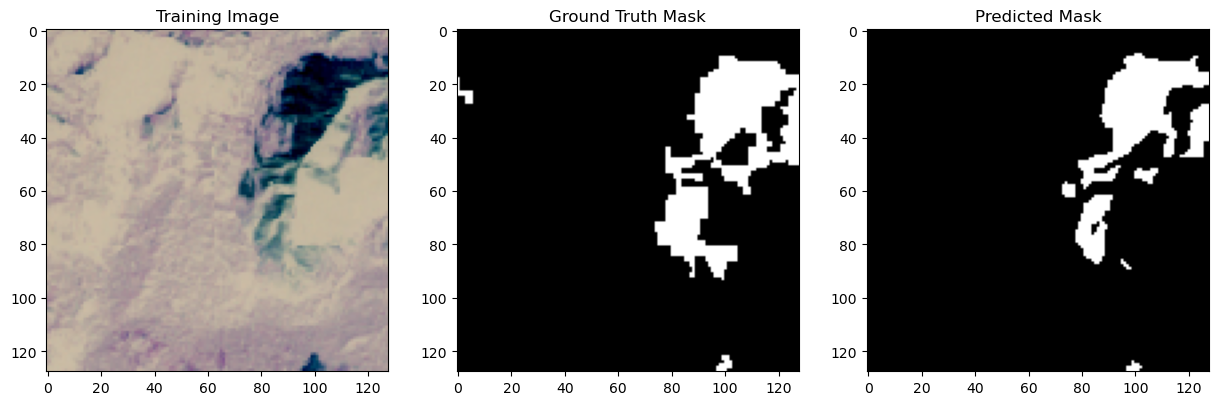

IoU: 0.90


In [49]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def calculate_iou(pred_mask, true_mask):
    """
    Calculate the Intersection over Union (IoU) of two segmentation masks.
    
    Parameters:
    pred_mask (numpy.ndarray): The predicted segmentation mask.
    true_mask (numpy.ndarray): The ground truth segmentation mask.
    
    Returns:
    float: The Intersection over Union score.
    """
    intersection = np.logical_and(pred_mask, true_mask).sum()
    union = np.logical_or(pred_mask, true_mask).sum()
    return intersection / union

def visualize_masks(training_image, true_mask, pred_mask):
    """
    Visualize the ground truth and predicted segmentation masks.
    
    Parameters:
    training_image (numpy.ndarray): The input image.
    true_mask (numpy.ndarray): The ground truth segmentation mask.
    pred_mask (numpy.ndarray): The predicted segmentation mask.
    """
    # Create the figure
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))
    
    # Plot the images
    ax1.imshow(training_image)
    ax1.set_title("Training Image")
    ax2.imshow(true_mask, cmap='gray')
    ax2.set_title("Ground Truth Mask")
    ax3.imshow(pred_mask, cmap='gray')
    ax3.set_title("Predicted Mask")
    
    plt.show()

def semantic_segmentation_iou(training_image_path, true_mask_path, pred_mask_path):
    """
    Calculate the IoU for semantic segmentation on the given images.
    
    Parameters:
    training_image_path (str): The file path to the input image.
    true_mask_path (str): The file path to the ground truth segmentation mask.
    pred_mask_path (str): The file path to the predicted segmentation mask.
    
    Returns:
    float: The Intersection over Union score.
    """
    # Load the images
    training_image = np.array(Image.open(training_image_path))
    true_mask = np.array(Image.open(true_mask_path))
    pred_mask = np.array(Image.open(pred_mask_path))
    
    # Calculate the IoU
    iou = calculate_iou(pred_mask, true_mask)
    
    # Visualize the masks
    visualize_masks(training_image, true_mask, pred_mask)
    
    return iou

# Example usage
training_image_path = r"D:\group -08\data\output\i\training_image.png"
true_mask_path = r"D:\group -08\data\output\m\label.png"
pred_mask_path = r"D:\group -08\data\output\p\prediction.png"

iou = semantic_segmentation_iou(training_image_path, true_mask_path, pred_mask_path)
print(f"IoU: {iou:.2f}")

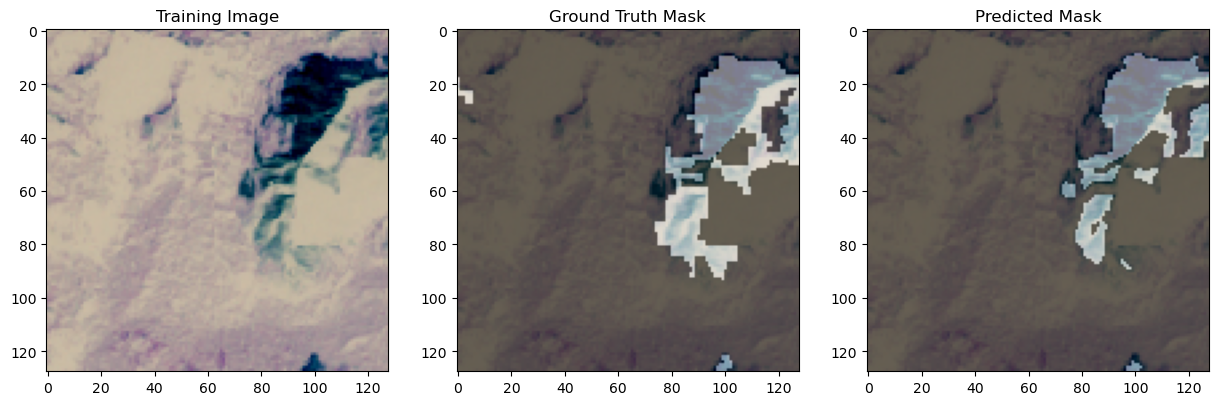

IoU: 0.90


In [50]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def calculate_iou(pred_mask, true_mask):
    """
    Calculate the Intersection over Union (IoU) of two segmentation masks.
    
    Parameters:
    pred_mask (numpy.ndarray): The predicted segmentation mask.
    true_mask (numpy.ndarray): The ground truth segmentation mask.
    
    Returns:
    float: The Intersection over Union score.
    """
    intersection = np.logical_and(pred_mask, true_mask).sum()
    union = np.logical_or(pred_mask, true_mask).sum()
    return intersection / union

def visualize_masks(training_image, true_mask, pred_mask):
    """
    Visualize the ground truth and predicted segmentation masks.
    
    Parameters:
    training_image (numpy.ndarray): The input image.
    true_mask (numpy.ndarray): The ground truth segmentation mask.
    pred_mask (numpy.ndarray): The predicted segmentation mask.
    """
    # Create the figure
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))
    
    # Plot the images
    ax1.imshow(training_image)
    ax1.set_title("Training Image")
    
    # Overlay the ground truth mask with red color
    ax2.imshow(training_image)
    ax2.imshow(true_mask, cmap='Reds', alpha=0.5)
    ax2.set_title("Ground Truth Mask")
    
    # Overlay the predicted mask with blue color
    ax3.imshow(training_image)
    ax3.imshow(pred_mask, cmap='Blues', alpha=0.5)
    ax3.set_title("Predicted Mask")
    
    plt.show()

def semantic_segmentation_iou(training_image_path, true_mask_path, pred_mask_path):
    """
    Calculate the IoU for semantic segmentation on the given images.
    
    Parameters:
    training_image_path (str): The file path to the input image.
    true_mask_path (str): The file path to the ground truth segmentation mask.
    pred_mask_path (str): The file path to the predicted segmentation mask.
    
    Returns:
    float: The Intersection over Union score.
    """
    # Load the images
    training_image = np.array(Image.open(training_image_path))
    true_mask = np.array(Image.open(true_mask_path))
    pred_mask = np.array(Image.open(pred_mask_path))
    
    # Calculate the IoU
    iou = calculate_iou(pred_mask, true_mask)
    
    # Visualize the masks
    visualize_masks(training_image, true_mask, pred_mask)
    
    return iou

# Example usage
training_image_path = r"D:\group -08\data\output\i\training_image.png"
true_mask_path = r"D:\group -08\data\output\m\label.png"
pred_mask_path = r"D:\group -08\data\output\p\prediction.png"

iou = semantic_segmentation_iou(training_image_path, true_mask_path, pred_mask_path)
print(f"IoU: {iou:.2f}")

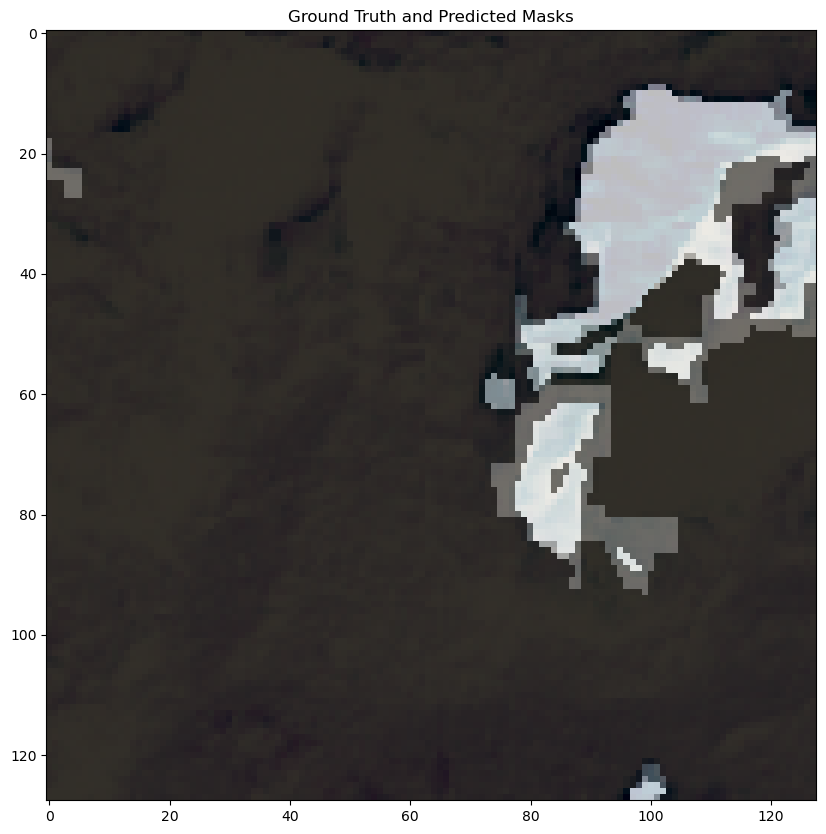

IoU: 0.90


In [51]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def calculate_iou(pred_mask, true_mask):
    """
    Calculate the Intersection over Union (IoU) of two segmentation masks.
    
    Parameters:
    pred_mask (numpy.ndarray): The predicted segmentation mask.
    true_mask (numpy.ndarray): The ground truth segmentation mask.
    
    Returns:
    float: The Intersection over Union score.
    """
    intersection = np.logical_and(pred_mask, true_mask).sum()
    union = np.logical_or(pred_mask, true_mask).sum()
    return intersection / union

def visualize_masks(training_image, true_mask, pred_mask):
    """
    Visualize the ground truth and predicted segmentation masks.
    
    Parameters:
    training_image (numpy.ndarray): The input image.
    true_mask (numpy.ndarray): The ground truth segmentation mask.
    pred_mask (numpy.ndarray): The predicted segmentation mask.
    """
    # Create the figure
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # Plot the training image
    ax.imshow(training_image)
    
    # Overlay the ground truth mask with red color
    ax.imshow(true_mask, cmap='Reds', alpha=0.5)
    
    # Overlay the predicted mask with blue color
    ax.imshow(pred_mask, cmap='Blues', alpha=0.5)
    
    # Combine the ground truth and predicted masks to show the differences
    combined_mask = np.zeros_like(true_mask)
    combined_mask[true_mask == 1] = 1  # Ground truth in red
    combined_mask[pred_mask == 1] = 2  # Predicted mask in blue
    ax.imshow(combined_mask, cmap='RdBu', alpha=0.5)
    
    ax.set_title("Ground Truth and Predicted Masks")
    plt.show()

def semantic_segmentation_iou(training_image_path, true_mask_path, pred_mask_path):
    """
    Calculate the IoU for semantic segmentation on the given images.
    
    Parameters:
    training_image_path (str): The file path to the input image.
    true_mask_path (str): The file path to the ground truth segmentation mask.
    pred_mask_path (str): The file path to the predicted segmentation mask.
    
    Returns:
    float: The Intersection over Union score.
    """
    # Load the images
    training_image = np.array(Image.open(training_image_path))
    true_mask = np.array(Image.open(true_mask_path))
    pred_mask = np.array(Image.open(pred_mask_path))
    
    # Calculate the IoU
    iou = calculate_iou(pred_mask, true_mask)
    
    # Visualize the masks
    visualize_masks(training_image, true_mask, pred_mask)
    
    return iou

# Example usage
training_image_path = r"D:\group -08\data\output\i\training_image.png"
true_mask_path = r"D:\group -08\data\output\m\label.png"
pred_mask_path = r"D:\group -08\data\output\p\prediction.png"

iou = semantic_segmentation_iou(training_image_path, true_mask_path, pred_mask_path)
print(f"IoU: {iou:.2f}")

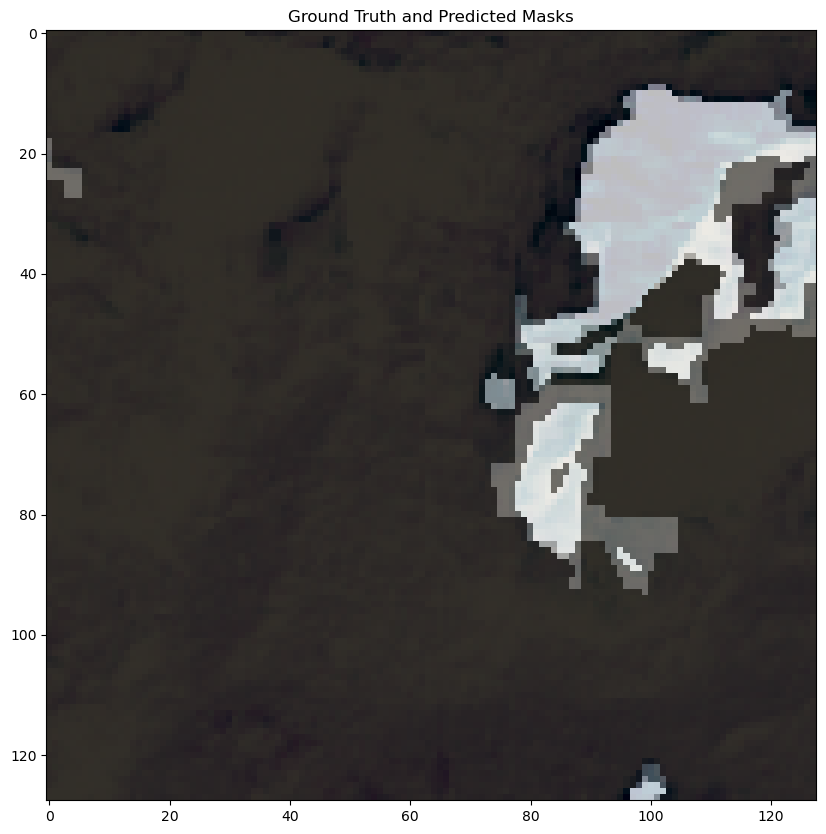

IoU: 0.90


In [52]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def calculate_iou(pred_mask, true_mask):
    """
    Calculate the Intersection over Union (IoU) of two segmentation masks.
    
    Parameters:
    pred_mask (numpy.ndarray): The predicted segmentation mask.
    true_mask (numpy.ndarray): The ground truth segmentation mask.
    
    Returns:
    float: The Intersection over Union score.
    """
    intersection = np.logical_and(pred_mask, true_mask).sum()
    union = np.logical_or(pred_mask, true_mask).sum()
    return intersection / union

def visualize_masks(training_image, true_mask, pred_mask):
    """
    Visualize the ground truth and predicted segmentation masks.
    
    Parameters:
    training_image (numpy.ndarray): The input image.
    true_mask (numpy.ndarray): The ground truth segmentation mask.
    pred_mask (numpy.ndarray): The predicted segmentation mask.
    """
    # Create the figure
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # Plot the training image
    ax.imshow(training_image)
    
    # Overlay the ground truth mask with red color
    ax.imshow(true_mask, cmap='Reds', alpha=0.5)
    
    # Overlay the predicted mask with blue color
    ax.imshow(pred_mask, cmap='Blues', alpha=0.5)
    
    # Combine the ground truth and predicted masks to show the differences
    combined_mask = np.zeros_like(true_mask)
    combined_mask[true_mask == 1] = 1  # Ground truth in red
    combined_mask[pred_mask == 1] = 2  # Predicted mask in blue
    ax.imshow(combined_mask, cmap='RdBu', alpha=0.5)
    
    ax.set_title("Ground Truth and Predicted Masks")
    plt.show()

def semantic_segmentation_iou(training_image_path, true_mask_path, pred_mask_path):
    """
    Calculate the IoU for semantic segmentation on the given images.
    
    Parameters:
    training_image_path (str): The file path to the input image.
    true_mask_path (str): The file path to the ground truth segmentation mask.
    pred_mask_path (str): The file path to the predicted segmentation mask.
    
    Returns:
    float: The Intersection over Union score.
    """
    # Load the images
    training_image = np.array(Image.open(training_image_path))
    true_mask = np.array(Image.open(true_mask_path))
    pred_mask = np.array(Image.open(pred_mask_path))
    
    # Calculate the IoU
    iou = calculate_iou(pred_mask, true_mask)
    
    # Visualize the masks
    visualize_masks(training_image, true_mask, pred_mask)
    
    return iou

# Example usage
training_image_path = r"D:\group -08\data\output\i\training_image.png"
true_mask_path = r"D:\group -08\data\output\m\label.png"
pred_mask_path = r"D:\group -08\data\output\p\prediction.png"

iou = semantic_segmentation_iou(training_image_path, true_mask_path, pred_mask_path)
print(f"IoU: {iou:.2f}")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Training Image')

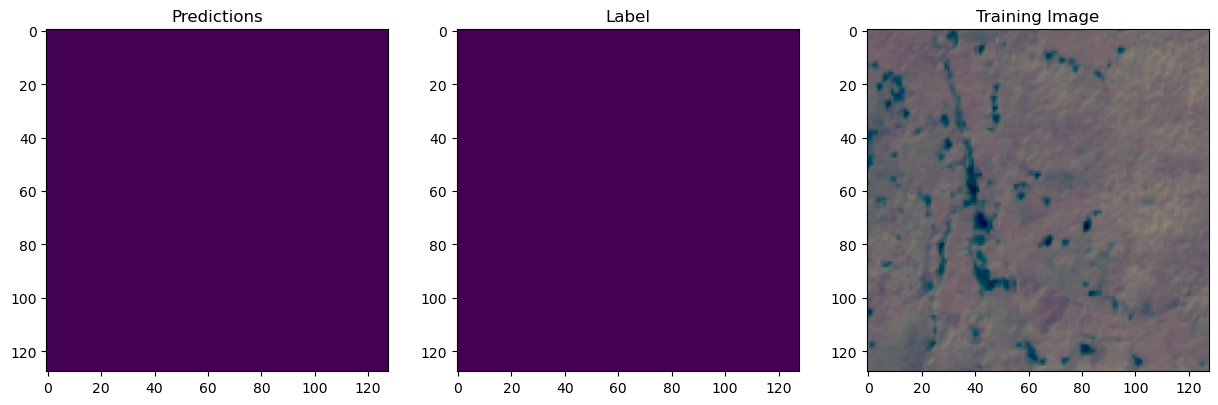

In [21]:
img = 100
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


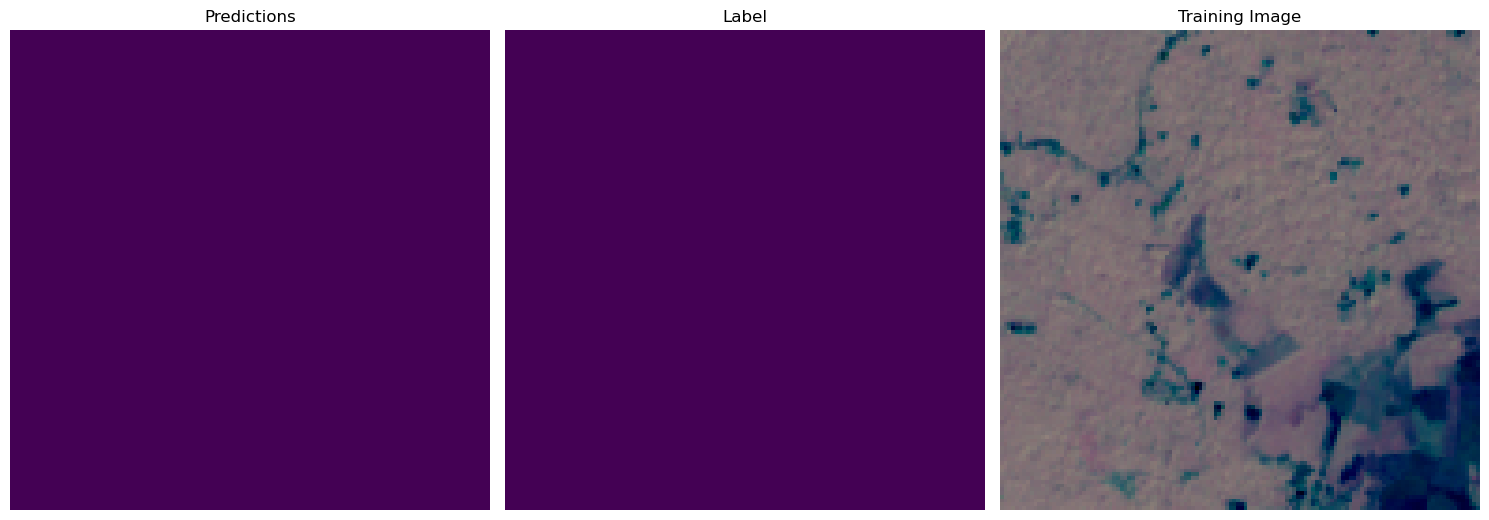

In [22]:
import matplotlib.pyplot as plt
from IPython.display import display

# Assuming pred_img, y_valid, and x_valid are already defined
img = 144

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))

# Display the prediction
ax1.imshow(pred_img[img, :, :, 0], cmap='viridis')
ax1.set_title("Predictions")
ax1.axis('off')

# Display the label
ax2.imshow(y_valid[img, :, :, 0], cmap='viridis')
ax2.set_title("Label")
ax2.axis('off')

# Display the training image
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')
ax3.axis('off')

# Adjust the layout and display the plot
plt.tight_layout()
display(fig)

# Close the figure to free up memory
plt.close(fig)

In [23]:
import numpy as np
import h5py
import glob

#validation_url = r"E:\Image analytics\Group - 4\data\ValidData\img\*.h5"
validation_url = r"D:\group -08\data\ValidData\img\*.h5"  # Modify this path

# Modify this path
img_val = sorted(glob.glob(validation_url))

VAL_XX = np.zeros((245, 128, 128, 6))
mask_name = []

for i, img in enumerate(img_val):
    print(f"Processing image {i+1}/{len(img_val)}: {img}")
    mask_name.append(img.split('\\')[-1].replace('image', 'mask'))
    with h5py.File(img, 'r') as hdf:
        # Inspect the structure of the HDF5 file
        print(f"HDF5 file structure: {list(hdf.keys())}")
        
        # Assuming 'img' is the correct key, adjust if necessary
        data = np.array(hdf.get('img'))
        
        print(f"Data shape: {data.shape}")
        print(f"Data type: {data.dtype}")
        
        # Convert data to float if it's not already
        data = data.astype(np.float64)

        # Check if data is 0-dimensional and handle accordingly
        if data.ndim == 0:
            print(f"Warning: Data for image {i+1} is 0-dimensional. Skipping this image.")
            continue

        # Assign a small value for the nan value
        data[np.isnan(data)] = 0.000001

        # Normalize the data 
        if data.ndim >= 3:
            mid_rgb = np.nanmax(data[:, :, 1:4]) / 2.0
            mid_slope = np.nanmax(data[:, :, 12]) / 2.0
            mid_elevation = np.nanmax(data[:, :, 13]) / 2.0

            # NDVI calculation
            data_red = data[:, :, 3]
            data_nir = data[:, :, 7]
            data_ndvi = np.divide(data_nir - data_red, data_nir + data_red, out=np.zeros_like(data_red), where=(data_nir+data_red)!=0)
            
            # Final array
            VAL_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  # RED
            VAL_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb  # GREEN
            VAL_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb  # BLUE
            VAL_XX[i, :, :, 3] = data_ndvi  # NDVI
            VAL_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope  # SLOPE
            VAL_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation  # ELEVATION
        else:
            print(f"Warning: Data for image {i+1} does not have enough dimensions. Skipping this image.")

print("Processing completed.")
print(f"Processed {len(mask_name)} images.")
print(f"VAL_XX shape: {VAL_XX.shape}")

# Print some statistics about the processed data
print(f"VAL_XX min value: {np.min(VAL_XX)}")
print(f"VAL_XX max value: {np.max(VAL_XX)}")
print(f"VAL_XX mean value: {np.mean(VAL_XX)}")
print(f"Number of NaN values in VAL_XX: {np.isnan(VAL_XX).sum()}")

Processing image 1/490: D:\group -08\data\ValidData\img\image_1.h5
HDF5 file structure: ['img']
Data shape: (128, 128, 14)
Data type: float64
Processing image 2/490: D:\group -08\data\ValidData\img\image_10.h5
HDF5 file structure: ['img']
Data shape: (128, 128, 14)
Data type: float64
Processing image 3/490: D:\group -08\data\ValidData\img\image_100.h5
HDF5 file structure: ['img']
Data shape: (128, 128, 14)
Data type: float64
Processing image 4/490: D:\group -08\data\ValidData\img\image_101.h5
HDF5 file structure: ['img']
Data shape: (128, 128, 14)
Data type: float64
Processing image 5/490: D:\group -08\data\ValidData\img\image_102.h5
HDF5 file structure: ['img']
Data shape: (128, 128, 14)
Data type: float64
Processing image 6/490: D:\group -08\data\ValidData\img\image_103.h5
HDF5 file structure: ['img']
Data shape: (128, 128, 14)
Data type: float64
Processing image 7/490: D:\group -08\data\ValidData\img\image_104.h5
HDF5 file structure: ['img']
Data shape: (128, 128, 14)
Data type: flo

In [24]:
threshold = 0.5
pred_img = model.predict(VAL_XX)
pred_img = (pred_img > threshold).astype(np.uint8)
pred_img.shape

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


(245, 128, 128, 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Training Image')

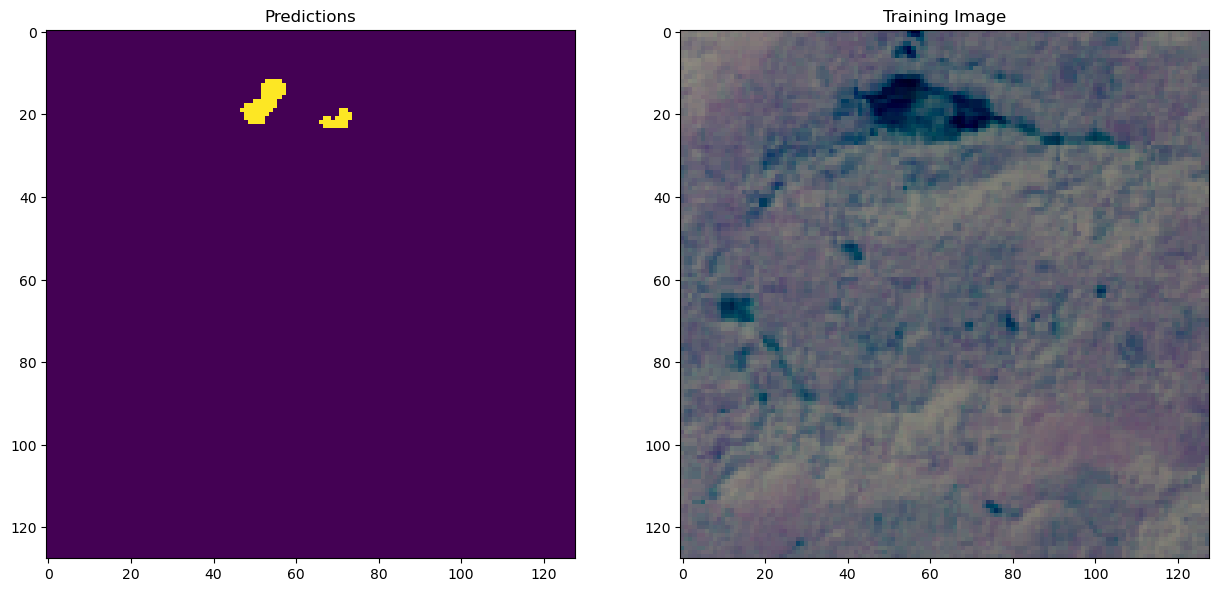

In [25]:
img = 69
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(VAL_XX[img, :, :, 0:3])
ax2.set_title('Training Image')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Training Image')

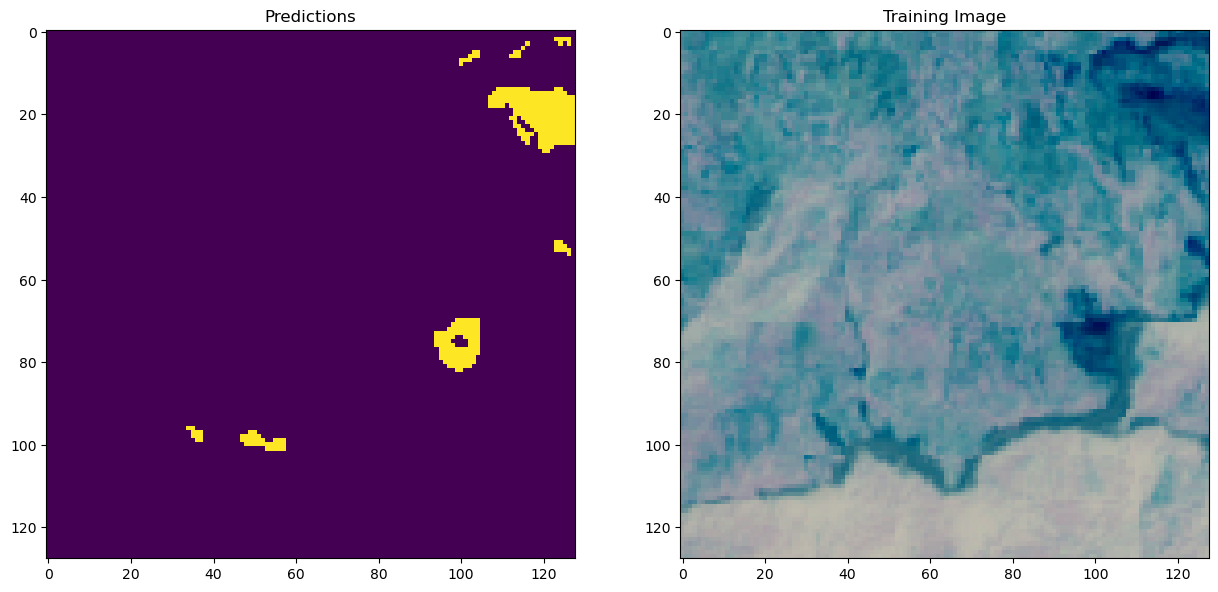

In [26]:
img = 144
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(VAL_XX[img, :, :, 0:3])
ax2.set_title('Training Image')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


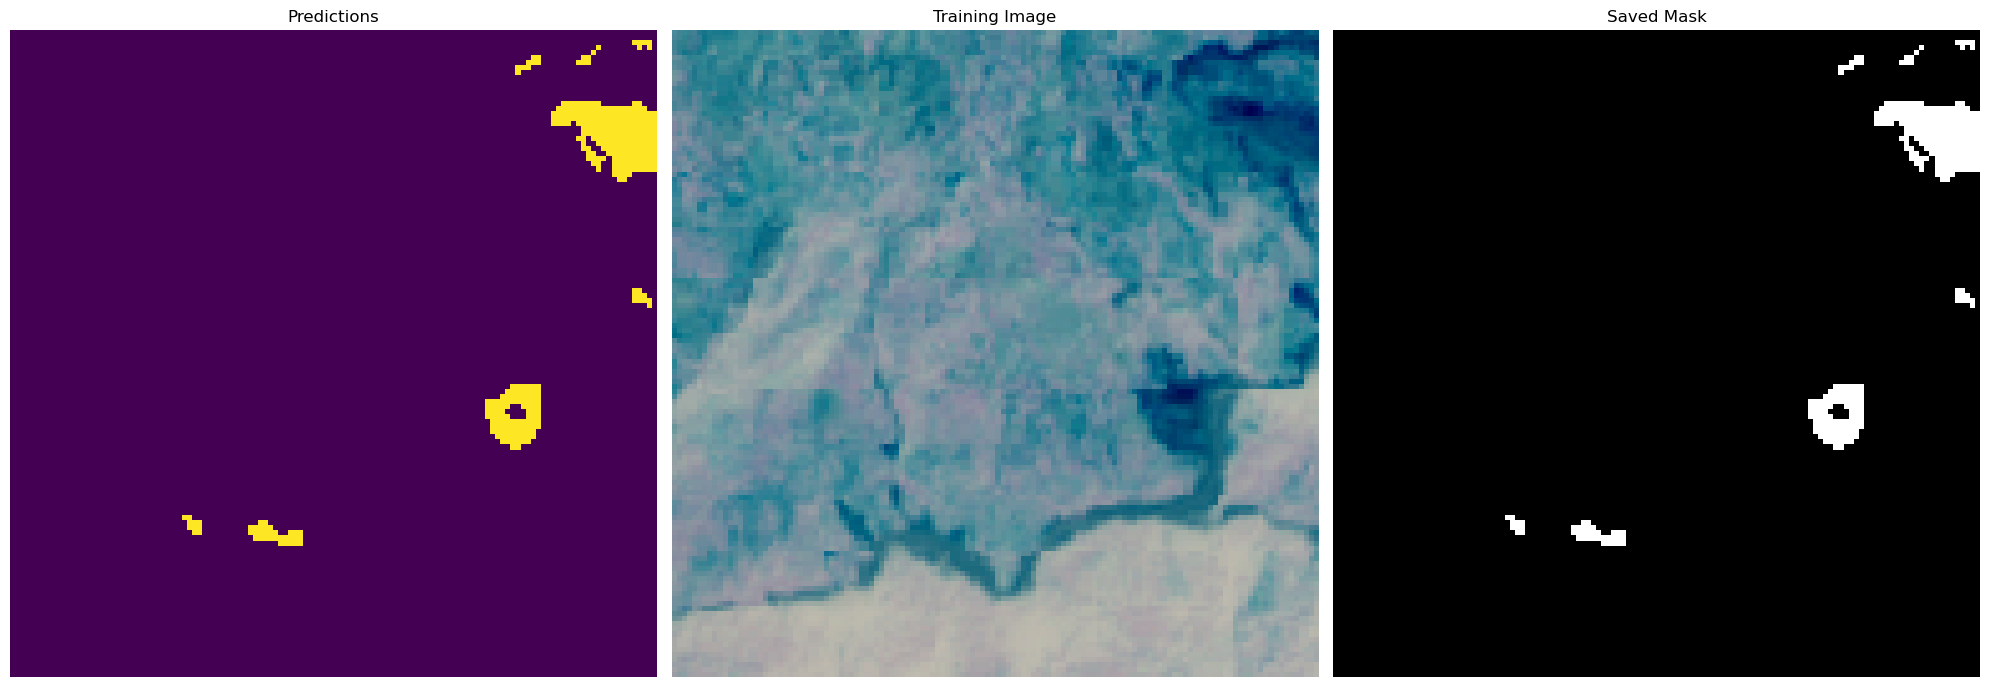

Visualization saved to: D:\group -08\data\visualization_144.png
Processed 245 images out of 490 mask names.


In [27]:
import os
import matplotlib.pyplot as plt
import h5py
import numpy as np
from IPython.display import display

img = 144
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

# Ensure img index is within bounds
img = min(img, len(pred_img) - 1)

ax1.imshow(pred_img[img, :, :, 0], cmap='viridis')
ax1.set_title("Predictions")
ax1.axis('off')

ax2.imshow(VAL_XX[img, :, :, 0:3])
ax2.set_title('Training Image')
ax2.axis('off')

# Create the output directory if it doesn't exist
write_directory = r"D:\group -08\data"
os.makedirs(write_directory, exist_ok=True)

# Ensure we only process valid indices
valid_indices = min(len(pred_img), len(mask_name))

for i in range(valid_indices):
    name = mask_name[i]
    output_file = os.path.join(write_directory, name)
    with h5py.File(output_file, 'w') as h5f:
        pred_mask = pred_img[i, :, :, 0]
        h5f.create_dataset('mask', data=pred_mask)
    
    # Display the saved mask for the current image
    if i == img:
        ax3.imshow(pred_mask, cmap='gray')
        ax3.set_title('Saved Mask')
        ax3.axis('off')

plt.tight_layout()

# Display the plot inline
display(fig)

# Save the figure
output_image_path = os.path.join(write_directory, f"visualization_{img}.png")
fig.savefig(output_image_path)
print(f"Visualization saved to: {output_image_path}")

# Close the figure to free up memory
plt.close(fig)

print(f"Processed {valid_indices} images out of {len(mask_name)} mask names.")